In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score


In [2]:
# Import the library to download files
import gdown

# Define the Google Drive file ID from the shared link
file_id = '1gbwBMoFv9qyE_Brs4wrPH5hIIm4wXZH-'

# Define the destination directory where you want to save the dataset
output_dir = '/content/'

# Construct the download URL
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file to the specified directory
gdown.download(url, output_dir + 'dataset.zip', quiet=False)

# Unzip the downloaded dataset
import zipfile
with zipfile.ZipFile(output_dir + 'dataset.zip', 'r') as zip_ref:
     zip_ref.extractall(output_dir)

# List the files in the directory to verify the extraction
import os
os.listdir(output_dir)

Downloading...
From: https://drive.google.com/uc?id=1gbwBMoFv9qyE_Brs4wrPH5hIIm4wXZH-
To: /content/dataset.zip
100%|██████████| 91.0M/91.0M [00:02<00:00, 32.5MB/s]


['.config', 'Training', 'dataset.zip', 'Testing', 'sample_data']

In [3]:
import ipywidgets as widgets #required for classification
import io #for input n output
from PIL import Image #PIL is Public Image Library
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle #for spliting train n test data..
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras import layers

FolderPaths

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/Training',i) #os.path.join joins two path to create a new.
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)
X_train.shape
#3264 images, 150 height, 150 width, 3 color channels


(3264, 150, 150, 3)

TRAIN TEST SPLIT

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train) #convert label indexes to categorical

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *


model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax')) #softmax we used b'coz we will be dealing with probaility, YES or NO

#we added this much layers coz we have 4 categories.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [10]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])


In [13]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
83/83 [==============================] - 27s 126ms/step - loss: 2.0661 - accuracy: 0.3148 - val_loss: 1.3551 - val_accuracy: 0.3027
Epoch 2/10
83/83 [==============================] - 8s 97ms/step - loss: 1.2339 - accuracy: 0.4408 - val_loss: 1.1637 - val_accuracy: 0.5034
Epoch 3/10
83/83 [==============================] - 8s 99ms/step - loss: 1.0115 - accuracy: 0.5573 - val_loss: 0.9309 - val_accuracy: 0.5986
Epoch 4/10
83/83 [==============================] - 8s 99ms/step - loss: 0.8723 - accuracy: 0.6186 - val_loss: 0.9028 - val_accuracy: 0.5952
Epoch 5/10
83/83 [==============================] - 8s 98ms/step - loss: 0.7562 - accuracy: 0.6814 - val_loss: 0.7056 - val_accuracy: 0.6905
Epoch 6/10
83/83 [==============================] - 8s 98ms/step - loss: 0.6755 - accuracy: 0.7246 - val_loss: 0.6138 - val_accuracy: 0.7245
Epoch 7/10
83/83 [==============================] - 8s 100ms/step - loss: 0.5313 - accuracy: 0.7817 - val_loss: 0.5720 - val_accuracy: 0.7517
Epoch 8/10

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

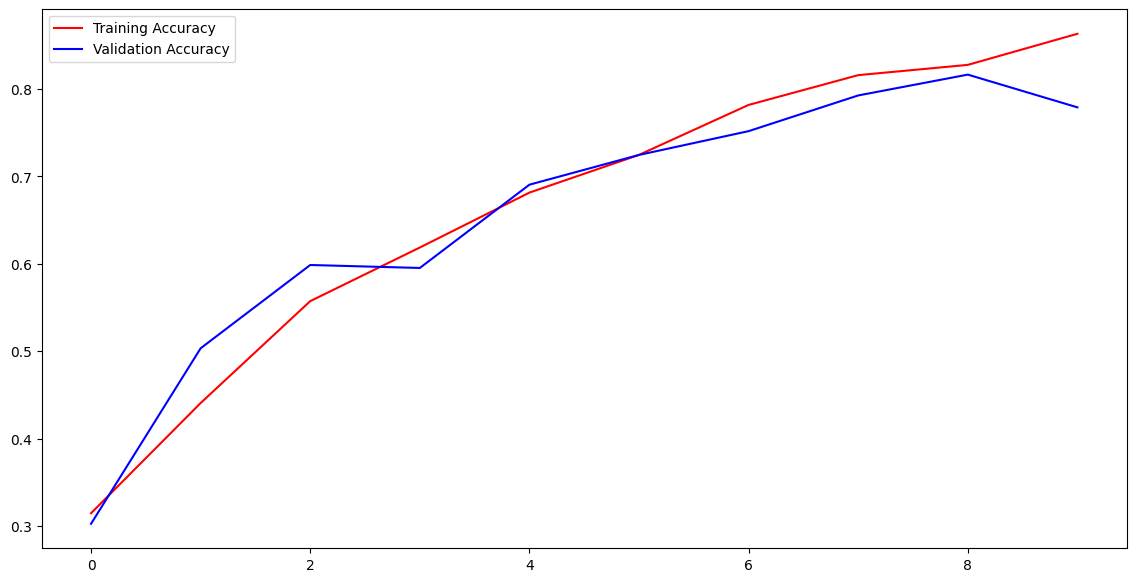

In [15]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs=range(len(acc))
fig = plt.figure(figsize=(14, 7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc="upper left")
plt.show()

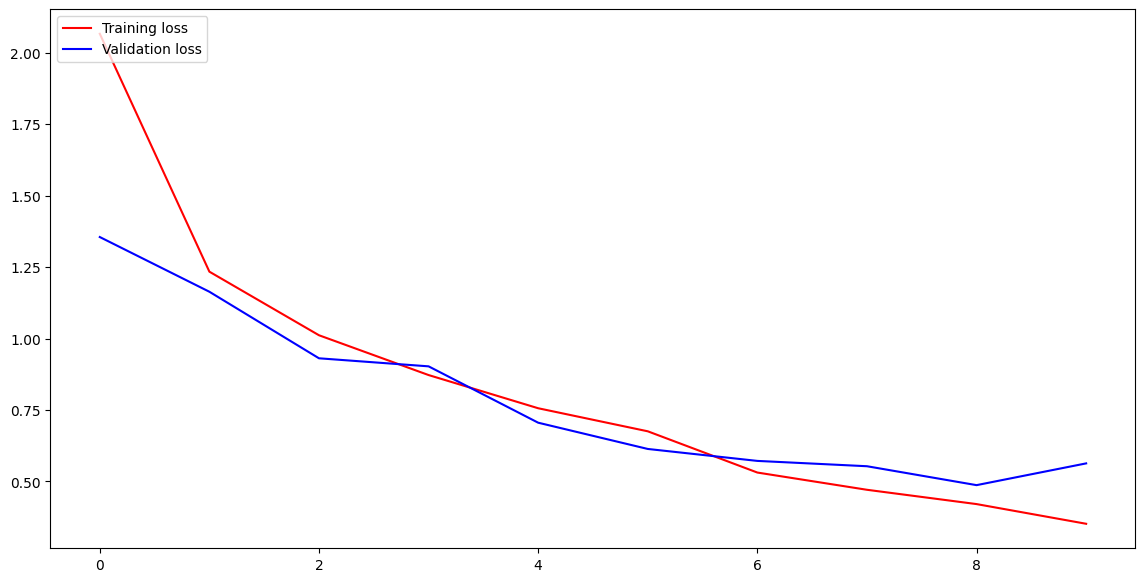

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(loss))
fig = plt.figure(figsize=(14, 7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc="upper left")
plt.show()

Prediction of the model

In [28]:
img = cv2.imread('/content/Testing/no_tumor/image(1).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [29]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

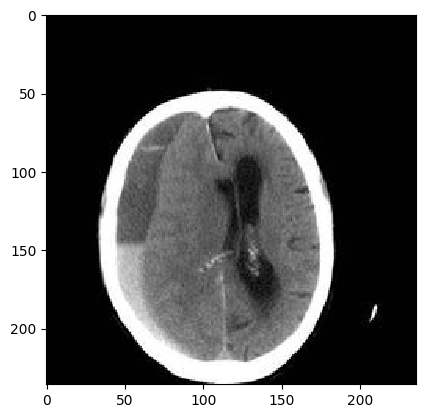

In [30]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Testing/no_tumor/image(1).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()


In [31]:
a=model.predict(img_array)
indices = a.argmax() #argmax() will return the largest value....
indices

1/1 [==============================] - 0s 19ms/step


2

####DISCLAIMER:

0-glioma_tumor,

1-meningioma_tumor,

2-No_tumor,

3-pituitary_tumor

Here, we seen that we can predict which  type of tumor it is..